In [1]:
#fas-정재환
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import csv
import json
import seaborn as sns
%matplotlib inline

In [2]:
#한글 폰트 적용 - 한글깨짐 방지
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# csv파일에서 20만행의 데이터 앍어오기
df = pd.read_csv('NHIS_OPEN_GJ_2017_4.csv', encoding='cp949', nrows=200000)
df

,Unnamed: 0,번호,성별,연령,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,총콜레스테롤,흡연상태,음주여부
0,0,1,1,40,170,75,90.0,120.0,80.0,99.0,193.0,1.0,1.0
1,1,2,1,35,180,80,89.0,130.0,82.0,106.0,228.0,3.0,0.0
2,2,3,1,45,165,75,91.0,120.0,70.0,98.0,136.0,1.0,0.0
3,3,4,1,55,175,80,91.0,145.0,87.0,95.0,201.0,1.0,0.0
4,4,5,1,55,165,60,80.0,138.0,82.0,101.0,199.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199772,199772,199996,1,45,170,100,107.0,135.0,88.0,112.0,247.0,3.0,1.0
199773,199773,199997,2,30,155,45,63.0,107.0,61.0,83.0,151.0,1.0,1.0
199774,199774,199998,1,55,160,70,91.0,100.0,76.0,100.0,222.0,1.0,0.0
199775,199775,199999,1,40,170,75,88.2,147.0,89.0,81.0,125.0,3.0,1.0


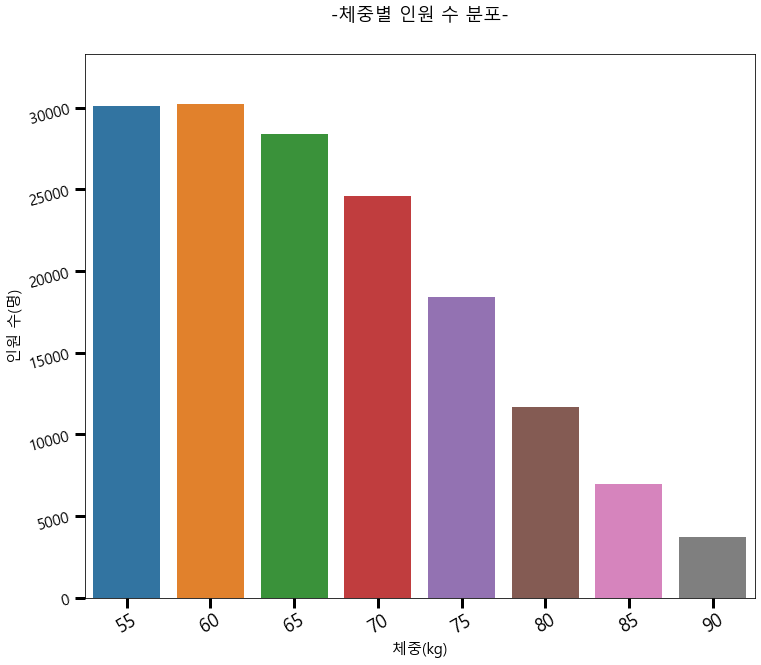

In [4]:
fig, ax = plt.subplots(figsize=(12, 10))

x = ['55', '60', '65', '70', '75', '80', '85', '90']
list_x = [55, 60, 65, 70, 75, 80, 85, 90] # x축 원소
y = [] # y축 값을 저장할 리스트
x_len = np.arange(0, len(x), 1) # 각 막대의 x축 위치

#x축 원소의 갯수만큼 반복
for i in range(len(x)):
    y.append(len(df[df['체중'] == list_x[i]])) # 각 체중별 인원수를 리스트에 저장

y_array = np.array(y) # 리스트 타입을 배열 타입으로 변환
y_token = y_array.max() / 3  # y축 최댓값을 3등분한 값
sns.barplot(x=x, y=y, ax=ax)

ax.set_title('-체중별 인원 수 분포-', fontsize=18, y=1.05)
ax.set_xlabel('체중(kg)', fontsize=15)
ax.set_ylabel('인원 수(명)', fontsize=15)
ax.set_xticks(x_len) # x축 원소 갯수만큼 나열
ax.set_xticklabels(x) # 각 x축 눈금의 라벨 설정
ax.set_ylim(0, y_array.max() * 1.1)
ax.tick_params(axis='x', rotation=30, labelsize=18, length=10, width=3)
ax.tick_params(axis='y', rotation=15, labelsize=15, length=10, width=3)

plt.show()

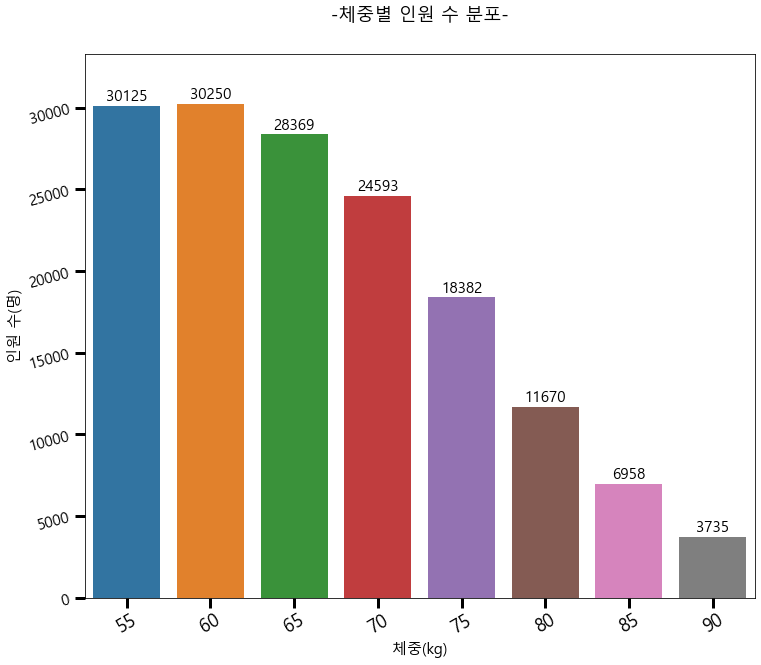

In [5]:
# 각 막대의 값을 숫자로 각각 출력해보자
fig, ax = plt.subplots(figsize=(12, 10))

x = ['55', '60', '65', '70', '75', '80', '85', '90']
list_x = [55, 60, 65, 70, 75, 80, 85, 90] # x축 원소
y = [] # y축 값을 저장할 리스트
x_len = np.arange(0, len(x), 1) # 각 막대의 x축 위치

#x축 원소의 갯수만큼 반복
for i in range(len(x)):
    y.append(len(df[df['체중'] == list_x[i]])) # 각 체중별 인원수를 리스트에 저장

y_array = np.array(y) # 리스트 타입을 배열 타입으로 변환
y_token = y_array.max() / 3  # y축 최댓값을 3등분한 값
sns.barplot(x=x, y=y, ax=ax)

#각 막대마다 크기를 숫자로 출력한다. xytext를 이용해 텍스트 위치를 각각 설정한다
for a, b in zip(x_len, y_array):
    label = str(b)
    ax.annotate(label, (a, b), textcoords="offset points", xytext=(0,5), ha='center', fontsize=15)

ax.set_title('-체중별 인원 수 분포-', fontsize=18, y=1.05)
ax.set_xlabel('체중(kg)', fontsize=15)
ax.set_ylabel('인원 수(명)', fontsize=15)
ax.set_xticks(x_len) # x축 원소 갯수만큼 나열
ax.set_xticklabels(x) # 각 x축 눈금의 라벨 설정
ax.set_ylim(0, y_array.max() * 1.1)
ax.tick_params(axis='x', rotation=30, labelsize=18, length=10, width=3)
ax.tick_params(axis='y', rotation=15, labelsize=15, length=10, width=3)

plt.show()

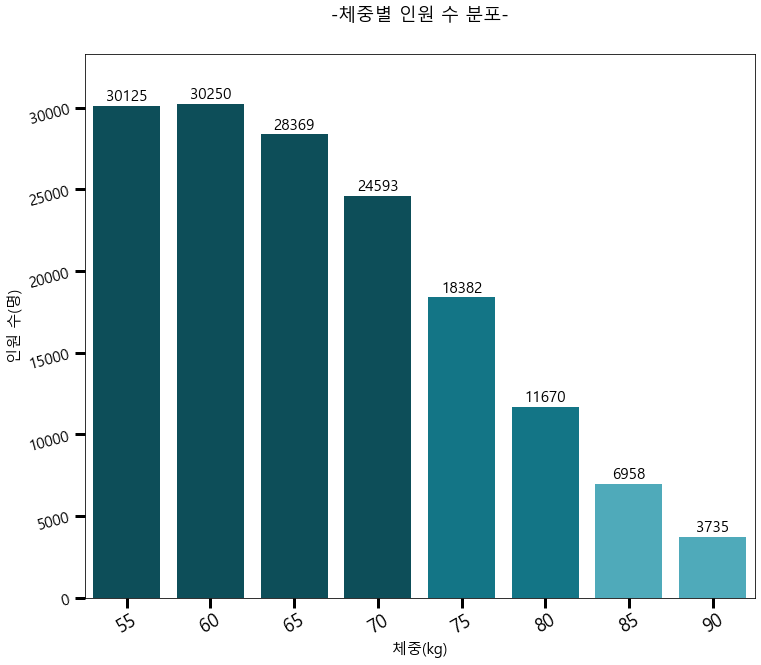

In [6]:
# 값의 크기가 클수록 막대 색깔이 진해지도록 설정해보자
fig, ax = plt.subplots(figsize=(12, 10))

x = ['55', '60', '65', '70', '75', '80', '85', '90']
list_x = [55, 60, 65, 70, 75, 80, 85, 90] # x축 원소
y = [] # y축 값을 저장할 리스트
x_len = np.arange(0, len(x), 1) # 각 막대의 x축 위치

#x축 원소의 갯수만큼 반복
for i in range(len(x)):
    y.append(len(df[df['체중'] == list_x[i]])) # 각 체중별 인원수를 리스트에 저장

y_array = np.array(y) # 리스트 타입을 배열 타입으로 변환
y_token = y_array.max() / 3  # y축 최댓값을 3등분한 값
# 값의 크기에 따라 3가지 색으로 구분한다
pal = ['#3DB7CC' if(0 <= x < (y_token))
       else '#008299' if(y_token <= x <(y_token*2)) else '#005766'
       for x in y]
sns.barplot(x=x, y=y, palette=pal, ax=ax)

#각 막대마다 크기를 숫자로 출력한다. xytext를 이용해 텍스트 위치를 각각 설정한다
for a, b in zip(x_len, y_array):
    label = str(b)
    ax.annotate(label, (a, b), textcoords="offset points", xytext=(0,5), ha='center', fontsize=15)

ax.set_title('-체중별 인원 수 분포-', fontsize=18, y=1.05)
ax.set_xlabel('체중(kg)', fontsize=15)
ax.set_ylabel('인원 수(명)', fontsize=15)
ax.set_xticks(x_len) # x축 원소 갯수만큼 나열
ax.set_xticklabels(x) # 각 x축 눈금의 라벨 설정
ax.set_ylim(0, y_array.max() * 1.1)
ax.tick_params(axis='x', rotation=30, labelsize=18, length=10, width=3)
ax.tick_params(axis='y', rotation=15, labelsize=15, length=10, width=3)

plt.show()